In [1]:
#import all lubrafy libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\mdans\Downloads\BostonHousing.csv",encoding='latin-1')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df=pd.DataFrame(df)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
#rename medv as target variable
df.rename(columns={'medv':'target'},inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
#separate the dependent and independent variables
X=df.drop('target',axis=1)
y=df['target']

print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64


In [7]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


<Axes: ylabel='Density'>

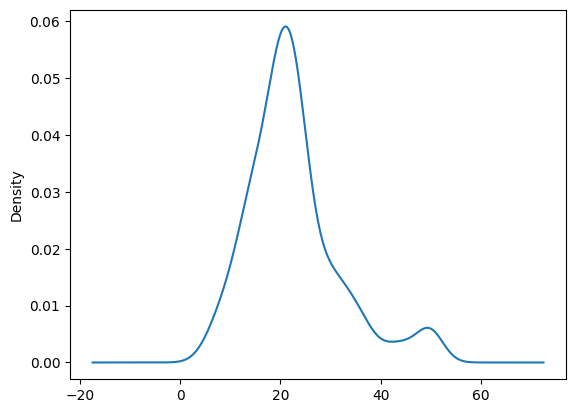

In [8]:
#kde plot
df['target'].plot(kind='kde')

In [9]:
#standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train) 
X_test=sc.transform(X_test)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr=LinearRegression()


In [11]:
mse=cross_val_score(lr,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [12]:
np.mean(mse)

np.float64(-24.114955703467764)

In [17]:
#prediction
from sklearn.metrics import mean_squared_error,r2_score
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(mse)
r2=r2_score(y_test,y_pred)
print(r2)

24.291119474973513
0.668759493535632


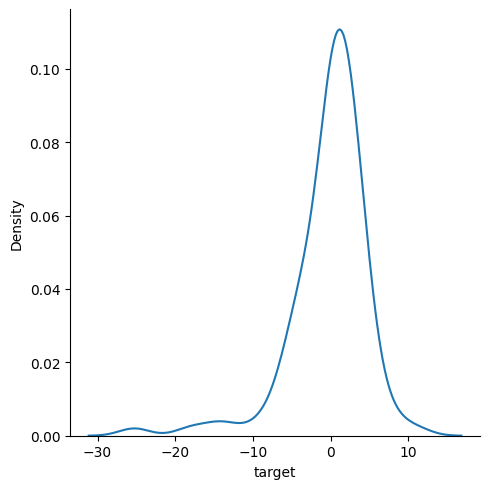

In [14]:
#displot
sns.displot(y_pred-y_test,kind='kde')

# ridge implementation

In [33]:
from sklearn.linear_model import Ridge

In [20]:
ridge=Ridge() # model


In [21]:
ridge

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [23]:
#parameter list with key value pair
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge,parameters,cv=10,scoring='neg_mean_squared_error' )
#fit
ridgecv.fit(X_train,y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,10


In [24]:

print(ridgecv.best_params_)
print(ridgecv.best_score_)

{'alpha': 10}
-24.06529564905994


In [25]:
print(ridgecv.best_estimator_)

Ridge(alpha=10)


In [26]:
print(ridgecv)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')


In [30]:
ridge_pred=ridgecv.predict(X_test)

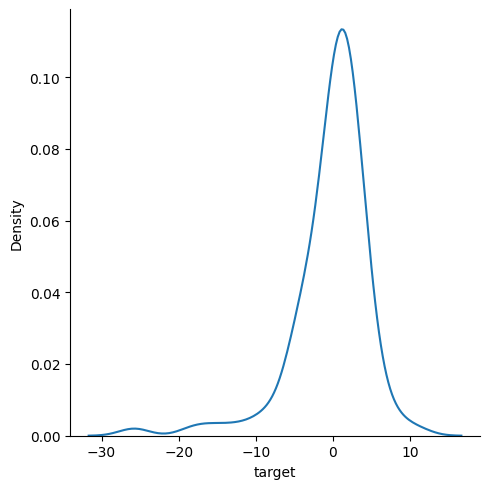

In [31]:
sns.displot(ridge_pred-y_test,kind='kde')

In [ ]:

print(r2_score(y_test,ridge_pred)) #r2 score

0.6659677905050339


#lasso implementation

In [34]:
#lasso 

from sklearn.linear_model import Lasso
lasso=Lasso()
lassocv=GridSearchCV(lasso,parameters,cv=10,scoring='neg_mean_squared_error')
lassocv.fit(X_train,y_train)
print(lassocv.best_params_)
print(lassocv.best_score_)
lasso_pred=lassocv.predict(X_test)
print(r2_score(y_test,lasso_pred))

{'alpha': 1}
-29.81048520664327
0.6239428734251421
